In [1]:
from lets_plot import *


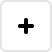
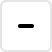
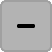
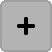
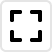
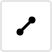
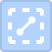
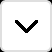
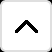
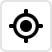
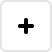
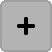
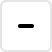
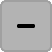
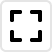
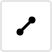
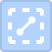
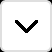
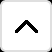
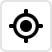

In [2]:
LetsPlot.setup_html()

In [3]:
color_margin = "#b3cde3"
color_key = "#decbe4"
color_label = "#fddaec"
color_plot = "#ccebc5"

In [4]:
def legend_element(elem_bnd):
    return geom_rect(xmin=elem_bnd[0], xmax=elem_bnd[2],
                     ymin=elem_bnd[1], ymax=elem_bnd[3],
                     fill=color_label, color=color_label, size=0) + \
        geom_rect(xmin=elem_bnd[0], xmax=elem_bnd[0] + 1.5,
                  ymin=elem_bnd[1], ymax=elem_bnd[3],
                  fill=color_key, color=color_key, size=0) + \
        geom_text(x=elem_bnd[0] + 0.1, y=(elem_bnd[3] + elem_bnd[1]) / 2,
                  label="key", vjust=0.5, hjust=0, size=10) + \
        geom_text(x=elem_bnd[0] + 1.6, y=(elem_bnd[3] + elem_bnd[1]) / 2,
                  label="label", vjust=0.5, hjust=0, size=10)

def legend(x, y, w=10, h=8):
    xmin = x
    xmax = x + w
    ymin = y
    ymax = ymin + h

    margin = 1
    space = 1
    title_h = 1.5
    elem_w = ((w - margin * 2) - space) / 2
    elem_h = ((h - margin * 2)) / 2 - space - 0.2

    # xmin, ymin, xmax, ymax
    inner_bnd = [xmin + margin, ymin + margin,
                 xmax - margin, ymax - margin]
    elem11 = [inner_bnd[0], inner_bnd[3] - title_h - elem_h,
              inner_bnd[0] + elem_w, inner_bnd[3] - title_h]
    elem12 = [inner_bnd[0] + elem_w + space, inner_bnd[3] - title_h - elem_h,
              inner_bnd[2], inner_bnd[3] - title_h]
    elem21 = [elem11[0], inner_bnd[1], elem11[2], inner_bnd[1] + elem_h]
    elem22 = [elem12[0], inner_bnd[1], inner_bnd[2], elem21[3]]

    # plot elements
    legend_background = geom_rect(xmin=xmin, xmax=xmax,
                                  ymin=ymin, ymax=ymax,
                                  fill=color_margin, size=1.5)
    legend_elements_box = geom_rect(xmin=inner_bnd[0], xmax=inner_bnd[2],
                                    ymin=inner_bnd[1], ymax=inner_bnd[3],
                                    fill='white', size=0)
    title = geom_text(label="Title",
                      x=inner_bnd[0] + 0.1, y=inner_bnd[3] - title_h / 2,
                      vjust=0.5, hjust=0, size=10)
    row1 = legend_element(elem11) + legend_element(elem12)
    row2 = legend_element(elem21) + legend_element(elem22)
    
    return legend_background + legend_elements_box + title + row1 + row2

def annotation_line(x, y, xend=None, yend=None, type_arrow='both', linetype='solid'):
    xend = xend if xend is not None else x
    yend = yend if yend is not None else y
    with_arrow = None
    if type_arrow is not None:
        with_arrow = arrow(length=5, ends=type_arrow, type='closed')

    return geom_segment(x=x, y=y, xend=xend, yend=yend, linetype=linetype, arrow=with_arrow)

In [5]:
plotting_area = geom_rect(xmin=0, xmax=3, ymin=-1, ymax=19,
                          fill=color_plot, color=color_margin,
                          size=14, alpha=0.5) + \
    geom_text(label='plotting area', x=2, y=10,
              hjust=0.5, vjust=0, angle=90, size=11, color='grey') + \
    geom_text(label='plot_inset', x=2.8, y=10,
              hjust=0.5, vjust=1, angle=90, family='Courier')
legend_box_spacing = geom_text(label='legend_box_spacing', x=4.2, y=10.5,
                               hjust=0, vjust=0, angle=90, family='Courier') + \
    annotation_line(x=3.3, y=10.2, xend=5)
legend_boxes = legend(x=5, y=10, w=15, h=8.5) + \
    legend(x=5, y=0, w=12, h=8.5) + \
    geom_text(label='legend_justification=[0,1]', x=23, y=19,
              hjust=1, vjust=0, family='Courier') + \
    annotation_line(x=-1, y=18.5, xend=22, type_arrow=None, linetype='dashed')
legend_annotations = (geom_text(label='legend_margin', x=15, y=18, hjust=0, family='Courier')) + \
    (geom_text(label='legend_spacing_y', x=6, y=9.2, hjust=0, family='Courier')
      + annotation_line(x=5.4, y=8.5, yend=10)) + \
    (geom_text(label='legend_key_spacing_x', x=12.8, y=9.2, hjust=0, family='Courier')
      + annotation_line(x=12, y=11.5, xend=13)
      + annotation_line(x=12.5, y=9.2, yend=11.5, type_arrow=None)) + \
    (geom_text(label='legend_key_spacing_y', x=14, y=13.5, hjust=0, family='Courier')
      + annotation_line(x=13.8, y=13.1, yend=13.9)) + \
    (geom_text(label='legend_box_just=\'left\' (legend_box=\'vertical\')',
               x=5.3, y=-1, hjust=0, family='Courier')
      + annotation_line(x=5, y=-2, yend=20, type_arrow=None, linetype='dashed')) + \
    (geom_text(label='legend_key_width', x=12, y=7, hjust=0, family='Courier')
      + annotation_line(x=11.5, y=6.5, xend=13)) + \
    (geom_text(label='legend_key_height', x=10.5, y=3.5, hjust=0, family='Courier')
      + annotation_line(x=11.2, y=4, yend=5.9))

In [6]:
ggplot() + \
    plotting_area + \
    legend_box_spacing + \
    legend_boxes + \
    legend_annotations + \
    coord_cartesian(xlim=(1.2, 23)) + \
    theme_void() + \
    ggsize(1000, 800)